# **Data Analysis for Supply Chain**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
from plotly.offline import iplot, init_notebook_mode
import pickle
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
from datetime import datetime
import plotly.express as px

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchinfo import summary
from tqdm.notebook import tqdm

In [3]:
path = "../../../dataco-smart-supply-chain-for-big-data-analysis"
df=pd.read_csv(path+"/DataCoSupplyChainDataset.csv", encoding='latin1')


In [4]:
df=df.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Product Description','Product Image','Order Zipcode','Customer Zipcode'],axis=1)


In [5]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df.rename(columns=lambda x: x.replace("(", "").replace(")", ""), inplace=True)

In [6]:
df = df[(df['product_card_id'] == 365)] 
# Splitting the 'order_date_dateorders' column into separate date and time columns
df[['date', 'time']] = df['order_date_dateorders'].str.split(' ', expand=True)
# Converting the 'date' column to datetime with the format '%m/%d/%Y'
df['order_date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
# Sorting the DataFrame by 'order_date' to ensure chronological order
df = df.sort_values(by='order_date')
# Resetting the index to start from 1
df.reset_index(drop=True, inplace=True)




In [7]:
df

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,category_name,customer_city,...,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date_dateorders,shipping_mode,date,time,order_date
0,DEBIT,6,4,5.690000,50.389999,Late delivery,1,17,Cleats,Caguas,...,COMPLETE,365,17,Perfect Fitness Perfect Rip Deck,59.990002,1/7/2015 15:24,Standard Class,1/1/2015,15:24,2015-01-01
1,PAYMENT,5,4,14.280000,50.990002,Late delivery,1,17,Cleats,Caguas,...,PENDING_PAYMENT,365,17,Perfect Fitness Perfect Rip Deck,59.990002,1/6/2015 20:19,Standard Class,1/1/2015,20:19,2015-01-01
2,DEBIT,2,4,43.119999,118.779999,Advance shipping,0,17,Cleats,Jersey City,...,ON_HOLD,365,17,Perfect Fitness Perfect Rip Deck,59.990002,1/3/2015 22:46,Standard Class,1/1/2015,22:46,2015-01-01
3,CASH,3,4,-102.029999,152.970001,Advance shipping,0,17,Cleats,Del Rio,...,CLOSED,365,17,Perfect Fitness Perfect Rip Deck,59.990002,1/4/2015 19:37,Standard Class,1/1/2015,19:37,2015-01-01
4,CASH,3,2,13.940000,49.790001,Late delivery,1,17,Cleats,Cordova,...,CLOSED,365,17,Perfect Fitness Perfect Rip Deck,59.990002,1/4/2015 12:36,Second Class,1/1/2015,12:36,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24510,DEBIT,4,4,45.389999,174.570007,Shipping on time,0,17,Cleats,Winter Park,...,COMPLETE,365,17,Perfect Fitness Perfect Rip Deck,59.990002,10/6/2017 10:40,Standard Class,10/2/2017,10:40,2017-10-02
24511,DEBIT,3,4,-0.820000,58.790001,Advance shipping,0,17,Cleats,Caguas,...,ON_HOLD,365,17,Perfect Fitness Perfect Rip Deck,59.990002,10/5/2017 12:04,Standard Class,10/2/2017,12:04,2017-10-02
24512,TRANSFER,3,2,26.490000,57.590000,Late delivery,1,17,Cleats,Aurora,...,PROCESSING,365,17,Perfect Fitness Perfect Rip Deck,59.990002,10/5/2017 5:04,Second Class,10/2/2017,5:04,2017-10-02
24513,PAYMENT,2,2,-302.350006,215.960007,Shipping on time,0,17,Cleats,Brooklyn,...,PENDING_PAYMENT,365,17,Perfect Fitness Perfect Rip Deck,59.990002,10/4/2017 4:43,Second Class,10/2/2017,4:43,2017-10-02


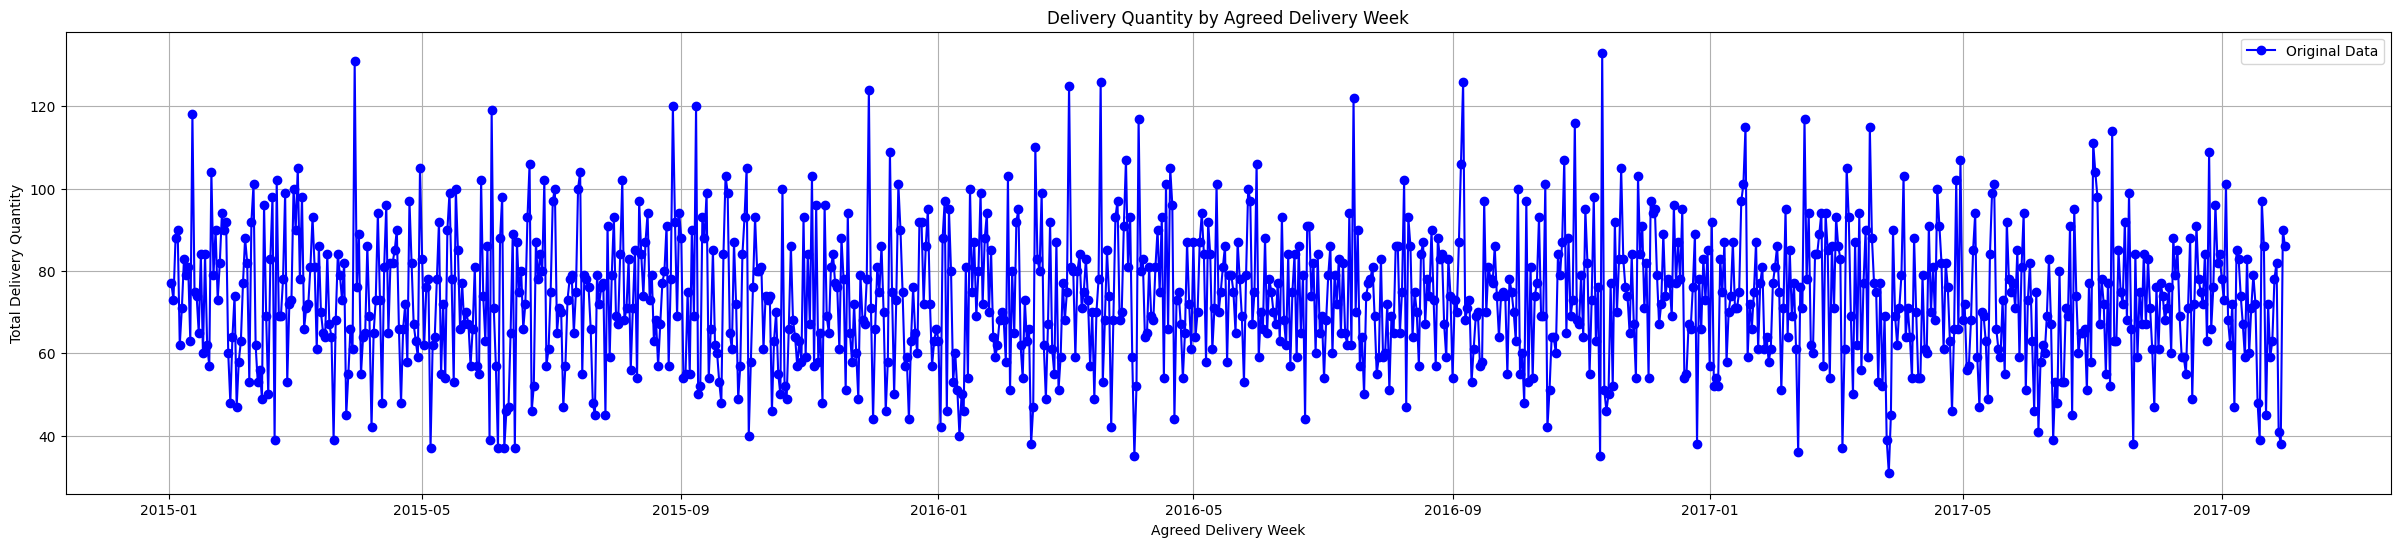

In [8]:
# dfx = df[(df['product_card_id'] == 365)] 

dfx = df.groupby('order_date')['order_item_quantity'].sum().reset_index()[1:-1]
plt.figure(figsize=(30, 6))
plt.plot(dfx['order_date'], dfx['order_item_quantity'], color='blue', marker='o', linestyle='-', label='Original Data')

plt.title('Delivery Quantity by Agreed Delivery Week')
plt.xlabel('Agreed Delivery Week')
plt.ylabel('Total Delivery Quantity')
plt.grid(True)
plt.legend()  # Show legend
plt.show()

In [9]:
# ['type', 'days_for_shipping_real', 'days_for_shipment_scheduled',
    #    'benefit_per_order', 'sales_per_customer', 'delivery_status',
    #    'late_delivery_risk', 'category_id', 'category_name', 'customer_city',
    #    'customer_country', 'customer_id', 'customer_segment', 'customer_state',
    #    'department_id', 'department_name', 'latitude', 'longitude', 'market',
    #    'order_city', 'order_country', 'order_customer_id',
    #    'order_date_dateorders', 'order_id', 'order_item_cardprod_id',
    #    'order_item_discount', 'order_item_discount_rate', 'order_item_id',
    #    'order_item_product_price', 'order_item_profit_ratio',
    #    'order_item_quantity', 'sales', 'order_item_total',
    #    'order_profit_per_order', 'order_region', 'order_state', 'order_status',
    #    'product_card_id', 'product_category_id', 'product_name',
    #    'product_price', 'shipping_date_dateorders', 'shipping_mode',
    #    'customer_full_name']

# feature = ['order_date','order_item_quantity','days_for_shipment_scheduled','category_name','customer_city','customer_country','customer_segment','customer_state','department_name','market','product_name','product_price','shipping_mode']
# feature = ['order_date','order_item_quantity','days_for_shipment_scheduled','category_name','customer_city','customer_country','customer_segment','customer_state','department_name','market','product_name','product_price','shipping_mode','order_item_discount','order_item_discount_rate','order_item_product_price','order_item_profit_ratio']
feature = ['order_date','order_item_quantity','category_name','customer_city','customer_country','customer_segment','customer_state','department_name','market','product_name','product_price','shipping_mode','order_item_discount','order_item_discount_rate','order_item_product_price','order_item_profit_ratio']
# feature = ['order_item_quantity','order_item_discount','order_item_discount_rate','order_item_product_price','order_item_profit_ratio','product_price']


df = df[feature]

In [10]:
df = df.drop_duplicates()

# Check for duplicated rows
duplicated_rows = df.duplicated()
# Filter the DataFrame to show duplicated rows
duplicated_df = df[duplicated_rows]
print("Duplicated Rows:")
print(duplicated_df)


Duplicated Rows:
Empty DataFrame
Columns: [order_date, order_item_quantity, category_name, customer_city, customer_country, customer_segment, customer_state, department_name, market, product_name, product_price, shipping_mode, order_item_discount, order_item_discount_rate, order_item_product_price, order_item_profit_ratio]
Index: []


In [11]:
# object_columns = ['category_name','customer_city','customer_country','customer_segment','customer_state','department_name','market','product_name','shipping_mode']
object_columns = df.select_dtypes(include=['object']).columns.tolist()
for e in object_columns:
    tmp = pd.get_dummies(df[e],drop_first=True)
    df.drop([e],axis=1,inplace=True)
    df = pd.concat([df,tmp],axis=1)
df.shape

(24515, 621)

In [12]:
train =   df[ df['order_date'] <= '2016-06' ]
val =  df[df['order_date'] <= '2017-01']
val =  val[val['order_date'] > '2016-06']
test =  df[df['order_date'] > '2017-01']

# df = df[df['order_date'] < '2017-10']

In [13]:
imputerealfeature = ['order_item_discount','order_item_discount_rate','order_item_product_price','order_item_profit_ratio']

for e in imputerealfeature:
    # Calculate the mean of 'order_item_discount' in the train set
    mean_train = train[e].mean()
    # Create a new column in the test set with the mean value from the train set
    test[e] = mean_train


In [14]:


dfx_train=train .loc[:, train .columns !='order_item_quantity']
y_train=train .loc[:, train .columns =='order_item_quantity']
dfx_val=val .loc[:, val .columns !='order_item_quantity']
y_val=val .loc[:, val .columns =='order_item_quantity']
dfx_test=test .loc[:, test .columns !='order_item_quantity']
y_test=test .loc[:, test .columns =='order_item_quantity']


# x_train, x_test,y_train,x_test = train_test_split(xorderitemquantity,yorderitemquantity,test_size = 0.3, random_state = 42)
x_train = dfx_train.drop(['order_date'],axis=1)
x_val = dfx_val.drop(['order_date'],axis=1)
x_test = dfx_test.drop(['order_date'],axis=1)

# x_train = dfx_train
# x_val = dfx_val
# x_test = dfx_test

print('x_train shape:',x_train.shape)
print('y_train shape:', y_train.shape, '\n')
print('x_val shape:',x_val.shape)
print('y_val shape:', y_val.shape, '\n')
print('x_test shape:',x_test.shape)
print('y_test shape:', y_test.shape)



# x_train, x_test,y_train,y_test = train_test_split(xorderitemquantity,yorderitemquantity,test_size = 0.3, random_state = 42)

x_train shape: (12697, 619)
y_train shape: (12697, 1) 

x_val shape: (5230, 619)
y_val shape: (5230, 1) 

x_test shape: (6588, 619)
y_test shape: (6588, 1)


In [15]:
x_train

,product_price,order_item_discount,order_item_discount_rate,order_item_product_price,order_item_profit_ratio,Alameda,Albany,Albuquerque,Algonquin,Alhambra,...,WA,WI,WV,Europe,LATAM,Pacific Asia,USCA,Same Day,Second Class,Standard Class
0,59.990002,9.600000,0.16,59.990002,0.11,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,59.990002,9.000000,0.15,59.990002,0.28,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,59.990002,1.200000,0.01,59.990002,0.36,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,59.990002,27.000000,0.15,59.990002,-0.67,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,59.990002,10.200000,0.17,59.990002,0.28,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12692,59.990002,6.600000,0.06,59.990002,-0.32,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
12693,59.990002,13.200000,0.06,59.990002,0.46,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
12694,59.990002,16.799999,0.07,59.990002,0.30,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12695,59.990002,4.800000,0.04,59.990002,0.05,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [16]:
y_train

,order_item_quantity
0,1
1,1
2,2
3,3
4,1
...,...
12692,2
12693,4
12694,4
12695,2


In [17]:
class RainfallDatasetFF(Dataset):
    def __init__(self, x, y, normalizer):
        self.x = x.astype(np.float32)
        self.y = y.astype(np.float32)
        self.normalizer = normalizer
        print(self.x.shape)
        print(self.y.shape)

    def __getitem__(self, index):
        x = self.x[index] # Retrieve data
        x = self.normalizer.transform(x.reshape(1, -1)) # Normalize
        y = self.y[index]
        return x, y

    def __len__(self):
        return self.x.shape[0]
    
def normalizer_std(X):
    scaler = preprocessing.StandardScaler().fit(X)
    return scaler

def normalizer_minmax(X):
    scaler = preprocessing.MinMaxScaler().fit(X)
    return scaler

In [18]:
import torch.nn as nn
import torch.nn.functional as F

class LSTM_Neural_Network(nn.Module):
    def __init__(self):
        super(LSTM_Neural_Network, self).__init__()
        self.lstm = nn.LSTM(x_train.shape[2], 200, batch_first=True)
        self.do1 = nn.Dropout(p=0.3)
        self.ff1 = nn.Linear(200, 200)
        self.do2 = nn.Dropout(p=0.3)
        self.out = nn.Linear(200, 1)

    def forward(self, x):
        hd1, _ = self.lstm(x)
        hd2 = F.relu(self.do1(hd1))
        hd3 = F.relu(self.ff1(hd2))    
        hd4 = F.relu(self.do2(hd3))
        y = self.out(hd4)
        timestep = x.size(1)  # Determine timestep dynamically
        return y.reshape(-1, timestep)


In [19]:

def extract_X(df, ntimesteps): 
    features = len(df.columns)
    X = list()
    
    #offset for timesteps
    offsets = list()
    for i in range (ntimesteps, 0, -1): 
        offsets.append(df.shift(i))
        
    #combine timestep columns into rows 
    combined = pd.concat(offsets, axis=1)
    combined = combined.tail(-ntimesteps) 
    combined.drop(combined.tail(1).index, inplace=True)
    
    #reshape each row (timesteps, features)
    for i in range(len(combined)): 
        row = combined.iloc[i].to_numpy()
        xrow = list()
        for n in range(ntimesteps): 
            xrow.append(row[n*features:(n*features)+features])
        X.append(xrow)
    
    #return as numpy array
    return np.array(X)

def extract_y(df, col_name, ntimesteps): 
    shifted = df.shift(-1)
    shifted = shifted.head(-2)
    shifted = shifted.tail(-(ntimesteps-1))
    return shifted[col_name].values


def normalizer_std_gru(X):
    scaler = preprocessing.StandardScaler().fit(X.reshape(len(X), -1))
    return scaler

class RainfallDatasetGRU(Dataset):
    def __init__(self, x, y, normalizer):
        self.x = x.astype(np.float32)
        self.y = y.astype(np.float32)
        self.normalizer = normalizer
        print(self.x.shape)
        print(self.y.shape)

    def __getitem__(self, index):
        x = self.x[index] # Retrieve data
        x = self.normalizer.transform(x.flatten().reshape(1, -1)).reshape(x.shape)
        y = self.y[index]
        return x, y

    def __len__(self):
        return self.x.shape[0]
timestep = 20
x_train = extract_X(x_train,timestep)
x_val = extract_X(x_val,timestep)
x_test = extract_X(x_test,timestep)

y_train = extract_X(y_train,timestep)
y_val = extract_X(y_val,timestep)
y_test = extract_X(y_test,timestep)


y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1]))
y_val =np.reshape(y_val, (y_val.shape[0], y_val.shape[1]))
y_test =np.reshape(y_test, (y_test.shape[0], y_test.shape[1]))
# y_train = extract_y(y_train,'order_qty',5)
# y_val = extract_y(y_val,'order_qty',5)
# y_test = extract_y(y_test,'order_qty',5)

# train_dataset = RainfallDatasetFF(x_train.to_numpy(), y_train.to_numpy(), normalizer)
# val_dataset = RainfallDatasetFF(x_val.to_numpy(), y_val.to_numpy(), normalizer)
# test_dataset = RainfallDatasetFF(x_test.to_numpy(), y_test.to_numpy(), normalizer)

normalizer = normalizer_std_gru(x_train)

train_dataset = RainfallDatasetGRU(x_train, y_train, normalizer)
val_dataset = RainfallDatasetGRU(x_val, y_val, normalizer)
test_dataset = RainfallDatasetGRU(x_test, y_test, normalizer)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, pin_memory=True)

(12676, 20, 619)
(12676, 20)
(5209, 20, 619)
(5209, 20)
(6567, 20, 619)
(6567, 20)


In [20]:
# loss_fn = nn.L1Loss()
loss_fn = nn.MSELoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [21]:
config = {
    'architecture': 'LSTM',
    'lr': 0.01,
    'scheduler_factor': 0.2,
    'scheduler_patience': 2,
    'scheduler_min_lr': 1e-4,
    'epochs': 30
}

# Model
model_gru = LSTM_Neural_Network()
model_gru = model_gru.to(device)
optimizer = torch.optim.Adam(model_gru.parameters(), lr=config['lr'])
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    'min',
    factor=config['scheduler_factor'],
    patience=config['scheduler_patience'],
    min_lr=config['scheduler_min_lr']
)

In [23]:


train_losses = []
val_losses = []
learning_rates = []

for epoch in range(config['epochs']):  # loop over the dataset multiple times

    # Training
    train_loss = []
    current_lr = optimizer.param_groups[0]['lr']
    learning_rates.append(current_lr)

    # Flag model as training. Some layers behave differently in training and
    # inference modes, such as dropout, BN, etc.
    model_gru.train()

    print(f"Training epoch {epoch+1}...")
    print(f"Current LR: {current_lr}")

    for i, (inputs, y_true) in enumerate(tqdm(train_loader)):
        # Transfer data from cpu to gpu
        inputs = inputs.to(device)
        y_true = y_true.to(device)

        # Reset the gradient
        optimizer.zero_grad()

        # Predict
        y_pred = model_gru(inputs)

        # Calculate loss
        loss = loss_fn(y_pred, y_true)

        # Compute gradient
        loss.backward()

        # Update parameters
        optimizer.step()

        # Log stuff
        train_loss.append(loss)

    avg_train_loss = torch.stack(train_loss).mean().item()
    train_losses.append(avg_train_loss)

    print(f"Epoch {epoch+1} train loss: {avg_train_loss:.4f}")

    # Validation
    model_gru.eval()
    with torch.no_grad(): # No gradient is required during validation
        print(f"Validating epoch {epoch+1}")
        val_loss = []
        for i, (inputs, y_true) in enumerate(tqdm(val_loader)):
            # Transfer data from cpu to gpu
            inputs = inputs.to(device)
            y_true = y_true.to(device)

            # Predict
            y_pred = model_gru(inputs)

            # Calculate loss
            loss = loss_fn(y_pred, y_true)

            # Log stuff
            val_loss.append(loss)

        avg_val_loss = torch.stack(val_loss).mean().item()
        val_losses.append(avg_val_loss)
        print(f"Epoch {epoch+1} val loss: {avg_val_loss:.4f}")

        # LR adjustment with scheduler
        scheduler.step(avg_val_loss)

        # Save checkpoint if val_loss is the best we got
        best_val_loss = np.inf if epoch == 0 else min(val_losses[:-1])
        if avg_val_loss < best_val_loss:
            # Save whatever you want
            state = {
                'epoch': epoch,
                'model': model_gru.state_dict(),
                'optimizer': optimizer.state_dict(),
                'scheduler': scheduler.state_dict(),
                'train_loss': avg_train_loss,
                'val_loss': avg_val_loss,
                'best_val_loss': best_val_loss,
            }

            print(f"Saving new best model..")
            torch.save(state, "model_LSTM.pth.tar")

Training epoch 1...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 1 train loss: 0.2276
Validating epoch 1


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 1 val loss: 1.0360
Saving new best model..
Training epoch 2...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 2 train loss: 0.2018
Validating epoch 2


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 2 val loss: 0.9963
Saving new best model..
Training epoch 3...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 3 train loss: 0.1810
Validating epoch 3


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 3 val loss: 0.9430
Saving new best model..
Training epoch 4...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 4 train loss: 0.1625
Validating epoch 4


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 4 val loss: 0.9339
Saving new best model..
Training epoch 5...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 5 train loss: 0.1498
Validating epoch 5


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 5 val loss: 0.9365
Training epoch 6...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 6 train loss: 0.1408
Validating epoch 6


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 6 val loss: 0.8895
Saving new best model..
Training epoch 7...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 7 train loss: 0.1372
Validating epoch 7


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 7 val loss: 0.8983
Training epoch 8...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 8 train loss: 0.1308
Validating epoch 8


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 8 val loss: 0.8692
Saving new best model..
Training epoch 9...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 9 train loss: 0.1229
Validating epoch 9


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 9 val loss: 0.8656
Saving new best model..
Training epoch 10...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 10 train loss: 0.1233
Validating epoch 10


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 10 val loss: 0.8529
Saving new best model..
Training epoch 11...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 11 train loss: 0.1217
Validating epoch 11


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 11 val loss: 0.8324
Saving new best model..
Training epoch 12...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 12 train loss: 0.1195
Validating epoch 12


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 12 val loss: 0.8555
Training epoch 13...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 13 train loss: 0.1189
Validating epoch 13


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 13 val loss: 0.8232
Saving new best model..
Training epoch 14...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 14 train loss: 0.1163
Validating epoch 14


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 14 val loss: 0.8205
Saving new best model..
Training epoch 15...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 15 train loss: 0.1166
Validating epoch 15


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 15 val loss: 0.8220
Training epoch 16...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 16 train loss: 0.1160
Validating epoch 16


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 16 val loss: 0.9098
Training epoch 17...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 17 train loss: 0.1180
Validating epoch 17


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 17 val loss: 0.8031
Saving new best model..
Training epoch 18...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 18 train loss: 0.1142
Validating epoch 18


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 18 val loss: 0.7982
Saving new best model..
Training epoch 19...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 19 train loss: 0.1140
Validating epoch 19


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 19 val loss: 0.7962
Saving new best model..
Training epoch 20...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 20 train loss: 0.1121
Validating epoch 20


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 20 val loss: 0.8075
Training epoch 21...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 21 train loss: 0.1130
Validating epoch 21


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 21 val loss: 0.7840
Saving new best model..
Training epoch 22...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 22 train loss: 0.1106
Validating epoch 22


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 22 val loss: 0.8338
Training epoch 23...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 23 train loss: 0.1132
Validating epoch 23


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 23 val loss: 0.7660
Saving new best model..
Training epoch 24...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 24 train loss: 0.1099
Validating epoch 24


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 24 val loss: 0.7763
Training epoch 25...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 25 train loss: 0.1108
Validating epoch 25


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 25 val loss: 0.7601
Saving new best model..
Training epoch 26...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 26 train loss: 0.1074
Validating epoch 26


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 26 val loss: 0.7674
Training epoch 27...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 27 train loss: 0.1085
Validating epoch 27


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 27 val loss: 0.7662
Training epoch 28...
Current LR: 0.01


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 28 train loss: 0.1100
Validating epoch 28


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 28 val loss: 0.7638
Training epoch 29...
Current LR: 0.002


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 29 train loss: 0.0919
Validating epoch 29


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 29 val loss: 0.7376
Saving new best model..
Training epoch 30...
Current LR: 0.002


  0%|          | 0/199 [00:00<?, ?it/s]

Epoch 30 train loss: 0.0848
Validating epoch 30


  0%|          | 0/82 [00:00<?, ?it/s]

Epoch 30 val loss: 0.7297
Saving new best model..


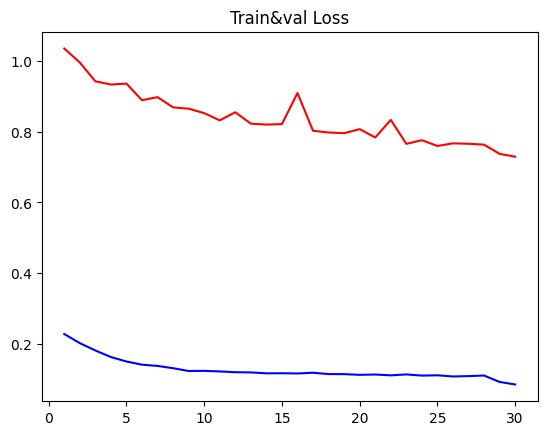

In [24]:
x = [i + 1 for i in range(config['epochs'])]

plt.plot(x, train_losses,color = 'blue')
plt.title("Train&val Loss")
plt.plot(x, val_losses,color = 'red')

plt.show()

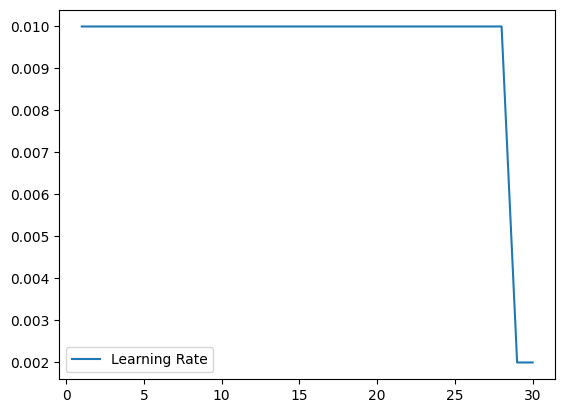

In [25]:
plt.plot(x, learning_rates, label="Learning Rate")
plt.legend()
plt.show()

In [26]:
# Assuming you have defined your model (model_gru) and loaded the test dataset (test_loader)

# Load the best model checkpoint
checkpoint = torch.load("model_LSTM.pth.tar")
model_gru.load_state_dict(checkpoint['model'])

# Set model to evaluation mode
model_gru.eval()

# Make predictions on the test set
predictions = []
with torch.no_grad():
    for inputs, _ in test_loader:  # assuming test_loader yields (inputs, _), where _ is ignored
        inputs = inputs.to(device)  # Transfer data to GPU if available
        y_pred = model_gru(inputs)
        predictions.append(y_pred.cpu().numpy())  # Convert predictions to numpy array and move to CPU

# Concatenate predictions into a single numpy array
predictions = np.concatenate(predictions)

# Now you have predictions for the test set, you can further process or analyze them as needed.


In [27]:

# predictions = pd.DataFrame(predictions, columns=['predictions'])

In [28]:
predictions.shape

(6567, 20)

In [29]:
y_test

array([[4., 1., 1., ..., 1., 3., 5.],
       [1., 1., 5., ..., 3., 5., 5.],
       [1., 5., 3., ..., 5., 5., 1.],
       ...,
       [1., 2., 5., ..., 3., 4., 3.],
       [2., 5., 4., ..., 4., 3., 1.],
       [5., 4., 4., ..., 3., 1., 1.]])

In [30]:
results_df =pd.DataFrame({"Actual": y_test[:, 0], "Predict": predictions[:, 0]})

In [31]:
df_test = test[:-21]

In [32]:
df_test['Actual'] = y_test[:, 0]

In [33]:
df_test['Predict'] = predictions[:, 0]

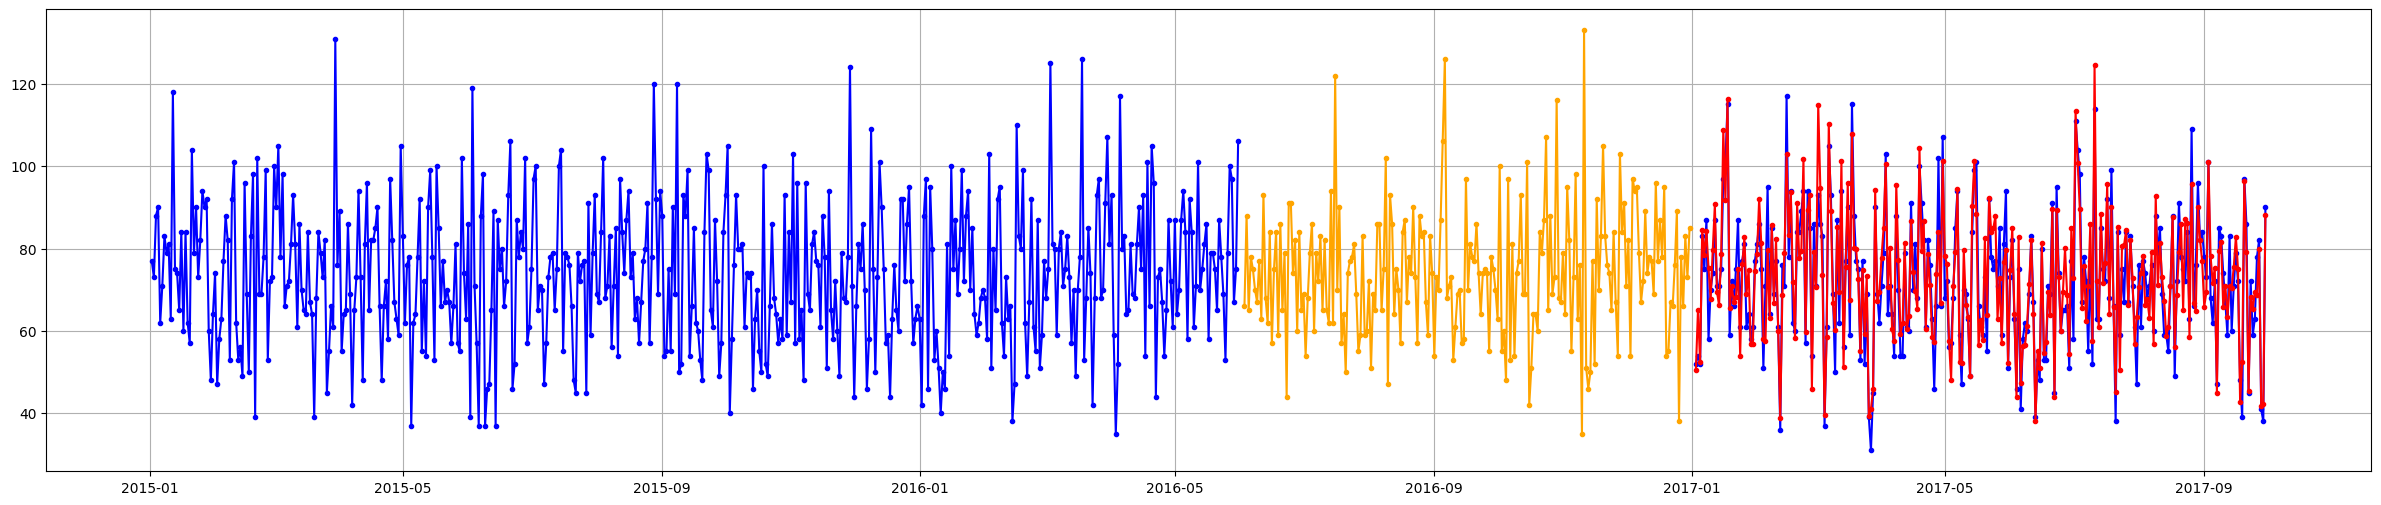

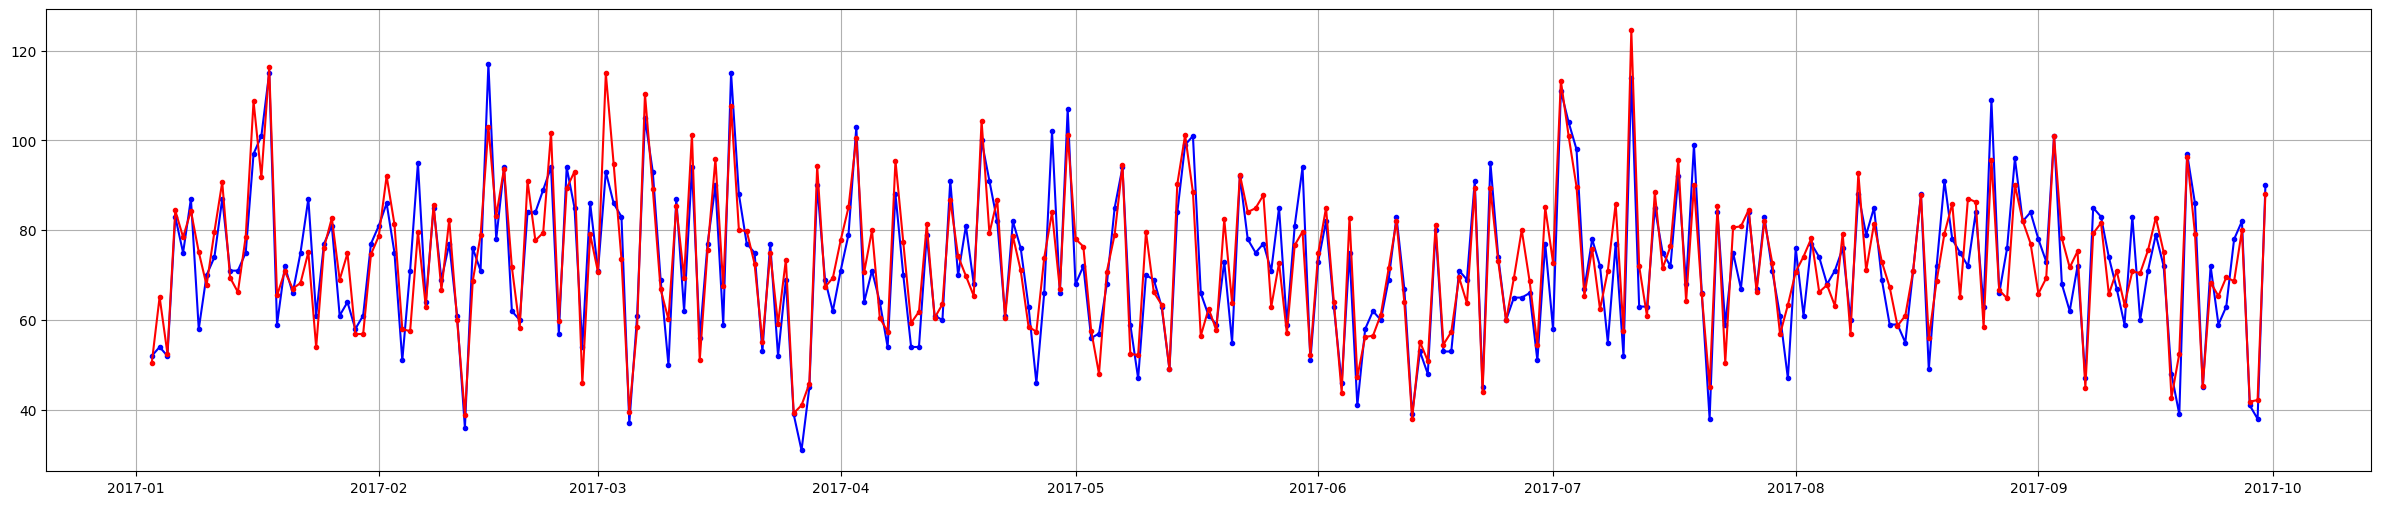

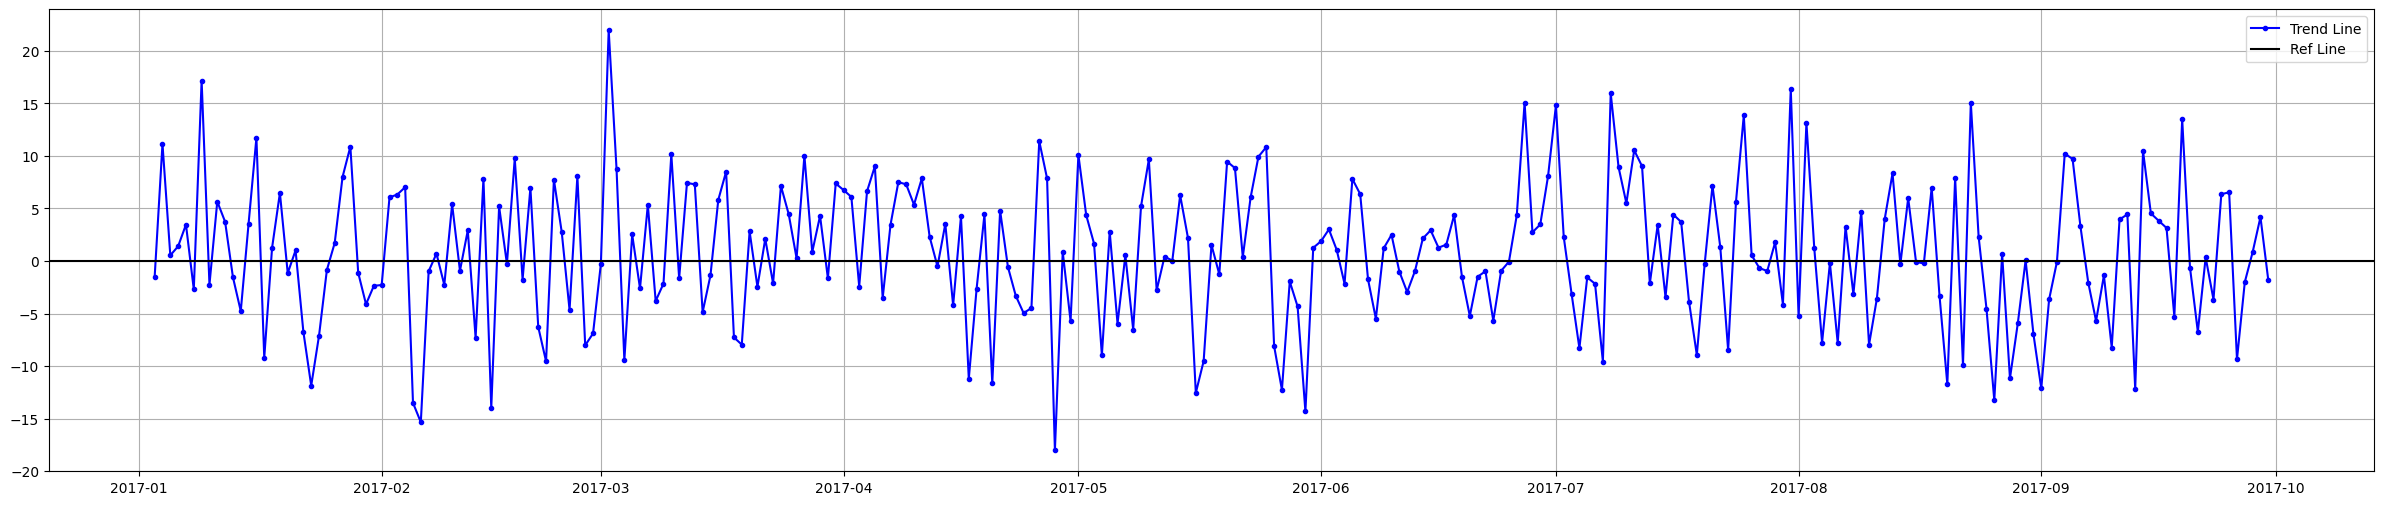

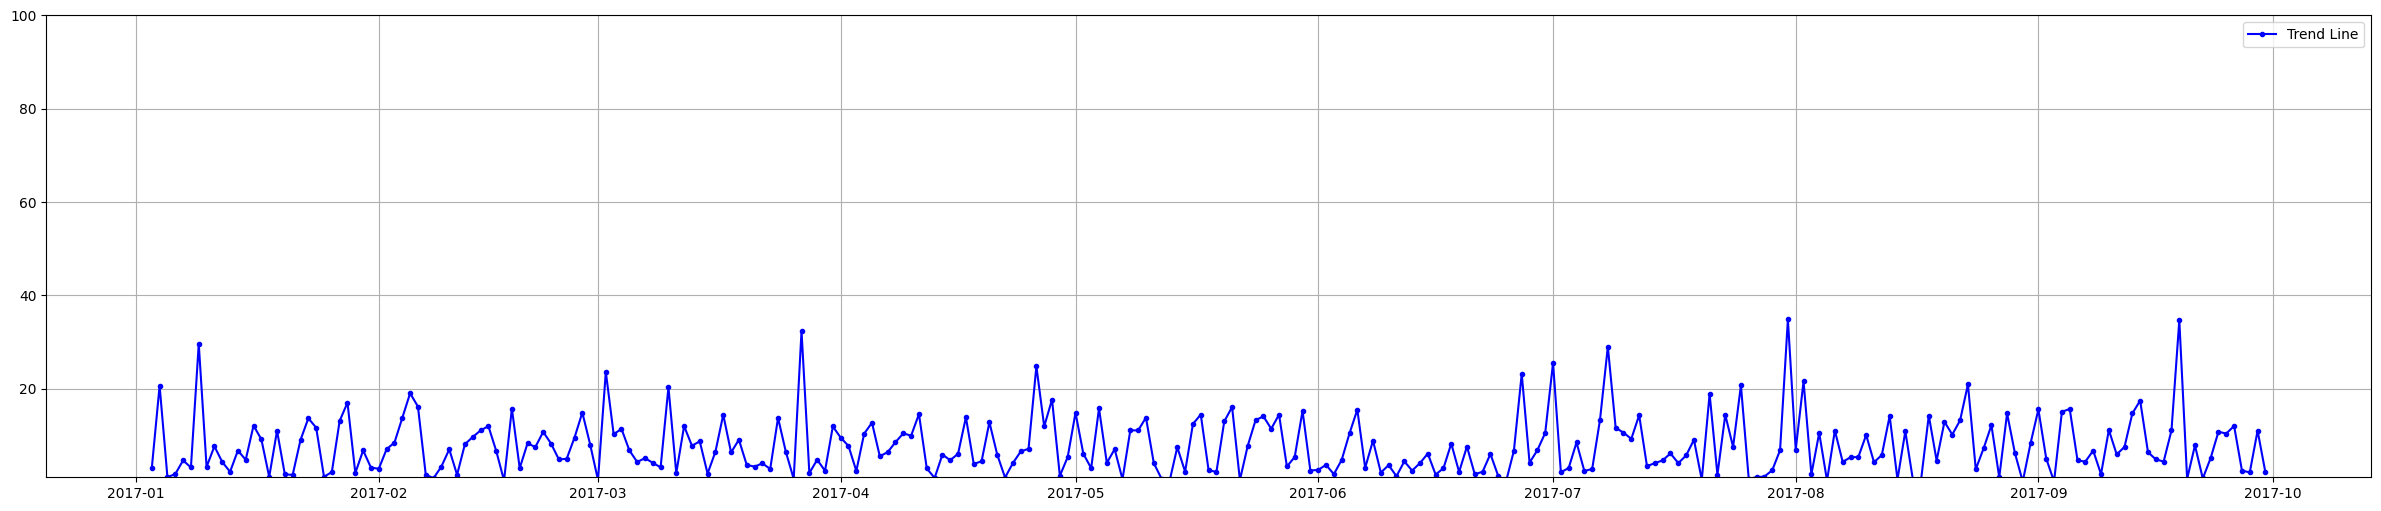

In [34]:

df_grouped_actual = df_test.groupby('order_date')['Actual'].sum().reset_index()[1:-1]
df_grouped_predict = df_test.groupby('order_date')['Predict'].sum().reset_index()[1:-1]

df_train = train.sort_values(by='order_date').reset_index()
df_train= df_train.groupby('order_date')['order_item_quantity'].sum().reset_index()[1:-1]

df_val = val.sort_values(by='order_date').reset_index()
df_val= df_val.groupby('order_date')['order_item_quantity'].sum().reset_index()[1:-1]

# Merging the two grouped DataFrames on 'order_date'
results_df = pd.merge(df_grouped_actual, df_grouped_predict, on='order_date', suffixes=('_actual', '_predict'))



plt.figure(figsize=(30, 6))
plt.plot(results_df['order_date'], results_df['Actual'], color='blue', marker='.', linestyle='-', label='Trend Line')
plt.plot(results_df['order_date'], results_df['Predict'], color='red', marker='.', linestyle='-', label='Trend Line')
plt.plot(df_train['order_date'], df_train['order_item_quantity'], color='blue', marker='.', linestyle='-', label='Trend Line')
plt.plot(df_val['order_date'], df_val['order_item_quantity'], color='orange', marker='.', linestyle='-', label='Trend Line')
plt.grid(True)
plt.show()


plt.figure(figsize=(30, 6))
plt.plot(results_df['order_date'], results_df['Actual'], color='blue', marker='.', linestyle='-', label='Trend Line')
plt.plot(results_df['order_date'], results_df['Predict'], color='red', marker='.', linestyle='-', label='Trend Line')
plt.grid(True)
plt.show()

plt.figure(figsize=(30, 6))
plt.plot(results_df['order_date'],results_df['Predict']-results_df['Actual'], color='blue', marker='.', linestyle='-', label='Trend Line')
plt.axhline(y=0, color='black', linestyle='-', label='Ref Line')
plt.grid(True)
plt.legend()  # Show legend
plt.show()


plt.figure(figsize=(30, 6))
plt.plot(results_df['order_date'], (abs(results_df['Predict'] - results_df['Actual']) / results_df['Actual']) * 100, color='blue', marker='.', linestyle='-', label='Trend Line')
plt.grid(True)
plt.legend()  # Show legend
plt.ylim(1, 100)  # Set y-axis limits
plt.show()

In [35]:
print("MAE of Total amount per order is         :", metrics.mean_absolute_error(df_test['Actual'],df_test['Predict']))  #Printing mean absolute error for predicting Number of products per order
print("RMSE of Total amount per order is        :",np.sqrt(metrics.mean_squared_error(df_test['Actual'],df_test['Predict'])))#Printing Root mean squared error for predicting Number of products per order


MAE of Total amount per order is         : 1.2175082197395546
RMSE of Total amount per order is        : 1.432750379801428


In [36]:
print("MAE of Total amount per order is         :", metrics.mean_absolute_error(results_df['Actual'],results_df['Predict']))  #Printing mean absolute error for predicting Number of products per order
print("RMSE of Total amount per order is        :",np.sqrt(metrics.mean_squared_error(results_df['Actual'],results_df['Predict'])))#Printing Root mean squared error for predicting Number of products per order


MAE of Total amount per order is         : 5.3609861958070875
RMSE of Total amount per order is        : 6.749070863607247
